# Маркетинговая аналитика развлекательного приложения  Procrastinate Pro+

**Цель исследования** — разобраться в причинах убытков и помочь компании выйти в плюс.

Для этого надо изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Необходимо провсти исследовательский анализ:
- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Необходимо провести маркетинговый анализ:
- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

Необходимо оценить окупаемость рекламы:

- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответить на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

**Описание проекта**

Заказчик — развлекательное приложение Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс..

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ.
 4. Маркетинговый анализ.
 5. Оценить окупаемость рекламы.
 
## Описание данных

Структура таблицы `visits`:
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

Структура таблицы `orders`:
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

Структура таблицы ` costs`:
* `dt` — дата проведения рекламной кампании,
* `Channel` — идентификатор рекламного источника,
* `costs` — расходы на эту кампанию.


## Обзор данных

### Открыть файл с данными и изучить общую информацию

Импортирую библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta

# импорт библиотеки warnings
import warnings
warnings.filterwarnings('ignore')

# задам точность отображения данных типа float (2 знака после запятой)
pd.options.display.float_format = '{:.2f}'.format

Считываю данные из файла visits_info_short.csv и сохраню их в датафрейм visits.

In [2]:
import os

pth1 = '/datasets/visits_info_short.csv' 
pth2 = 'https://code.s3.yandex.net/datasets/visits_info_short.csv' 

if os.path.exists(pth1):
    visits = pd.read_csv(pth1) 
elif os.path.exists(pth2):
    visits = pd.read_csv(pth2) 
else:
    print('Something is wrong')

Считываю данные из файла orders_info_short.csv и сохраню их в датафрейм orders.

In [3]:
pth1 = '/datasets/orders_info_short.csv' 
pth2 = 'https://code.s3.yandex.net/datasets/orders_info_short.csv' 

if os.path.exists(pth1):
    orders = pd.read_csv(pth1) 
elif os.path.exists(pth2):
    orders = pd.read_csv(pth2) 
else:
    print('Something is wrong')

Считываю данные из файла costs_info_short.csv и сохраню их в датафрейм costs.

In [4]:
pth1 = '/datasets/costs_info_short.csv' 
pth2 = 'https://code.s3.yandex.net/datasets/costs_info_short.csv' 

if os.path.exists(pth1):
    costs = pd.read_csv(pth1) 
elif os.path.exists(pth2):
    costs = pd.read_csv(pth2) 
else:
    print('Something is wrong')

Выведу первые 5 строчек всех датафреймов на экран, чтобы ознакомиться с данными, проверить нужные ли данные были загружены.

In [5]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Выведу основную информацию о датафрейме.

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице 6 столбцов и 309901 строки: 
- 1 столбцов - тип данных int;
- 5 столбцов - тип данных object.

1. Названия столбцов необходимо привести к нижнему регистру, пробелы заменить на нижнее подчеркивание.

2. У столбца `Session Start` и `Session End` тип данных object , когда в нем записаны дата и время, с этим надо будет поработать и изменить тип данных на datetime. Тип данных остальных столбцов вполне соответствует действительности. 

3. Пропуски данных отсутствуют. 

Согласно документации к данным:
Структура таблицы `visits`:
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

In [7]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Выведу основную информацию о датафрейме.

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице 3 столбца и 40212 строки: 
- 1 столбец - тип данных int;
- 1 столбец - тип данных float;
- 1 столбец - тип данных object.

1. Названия столбцов необходимо привести к нижнему регистру, пробелы заменить на нижнее подчеркивание.

2. У столбца `Event Dt` тип данных object , когда в нем записаны дата и время, необходимо изменить тип данных на datetime. Тип данных остальных столбцов вполне соответствует действительности. 

3. Пропуски данных отсутствуют. 

Согласно документации к данным:
Структура таблицы `orders`:
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

In [9]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.30
1,2019-05-02,FaceBoom,78.10
2,2019-05-03,FaceBoom,85.80
3,2019-05-04,FaceBoom,136.40
4,2019-05-05,FaceBoom,122.10


Выведу основную информацию о датафрейме.

In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице 3 столбца и 1800 строки: 
- 1 столбец - тип данных float;
- 2 столбца - тип данных object.

1. Названия столбцов необходимо привести к нижнему регистру.

2. У столбца `dt` тип данных object , когда в нем записаны дата и время, необходимо изменить тип данных на datetime. Тип данных остальных столбцов вполне соответствует действительности. 

3. Пропуски данных отсутствуют. 

Согласно документации к данным:
Структура таблицы ` costs`:
* `dt` — дата проведения рекламной кампании,
* `Channel` — идентификатор рекламного источника,
* `costs` — расходы на эту кампанию.

### Предобработка данных

#### Переименование столбцов

Все столбцы в датафрейме visits, orders, costs приведем к нижнему регистру и переименуем.

In [11]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

Далее в датафрейме visits и orders переименуем колонки, а точнее заменим пробелы на нижнее подчеркивание.

In [12]:
visits = visits.rename(columns = {'user id' : 'user_id',
                  'session start' : 'session_start',
                  'session end' : 'session_end'})

In [13]:
orders = orders.rename(columns = {'user id' : 'user_id',
                  'event dt' : 'event_dt'})

Выполним проверку и выведем названия колонок для каждого датафрейма.

In [14]:
print('названия столбцов таблицы visits\n {}\n названия столбцов таблицы orders \n{}\n названия столбцов таблицы costs \n{}'\
      .format(visits.columns, orders.columns, costs.columns))

названия столбцов таблицы visits
 Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
 названия столбцов таблицы orders 
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
 названия столбцов таблицы costs 
Index(['dt', 'channel', 'costs'], dtype='object')


Теперь названия столбцов корректные, можно перейти к следующему этапу предобработки данных - преобразование типов данных.

#### Преобразование типов данных

В таблице visits надо изменить тип данных столбцов `session_st` и `session_end` на datetime. В таблице orders надо изменить тип данных столбца `event_dt` на datetime. В таблице costs надо изменить тип данных столбца `dt` на datetime. 

In [15]:
# Преобразование типов данных в таблице visits
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

# Преобразование типов данных в таблице orders
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# Преобразование типов данных в таблице costs
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [16]:
# проверим изменение типов данных в таблице
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [17]:
# проверим изменение типов данных в таблице
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Типы данных теперь корректные. Далее проверю наличие дубликатов.

#### Дубликаты

Сначала проверю наличие явных дубликатов.

In [19]:
print('Количество явных дубликатов в таблице visits: {}\n'
      'Количество явных дубликатов в таблице orders: {}\n'
      'Количество явных дубликатов в таблице costs: {}'\
      .format(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum()))

Количество явных дубликатов в таблице visits: 0
Количество явных дубликатов в таблице orders: 0
Количество явных дубликатов в таблице costs: 0


Для проверки неявных дубликатов в таблице visits выведу уникальные значения столбцов строкового типа и изучу их.

In [20]:
print('Уникальные значения столбца region в таблице visits: \n{}\n \n'
      'Уникальные значения столбца device в таблице visits: \n{}\n \n'
      'Уникальные значения столбца channel в таблице visits: \n{}'\
      .format(visits['region'].unique(), visits['device'].unique(), visits['channel'].unique()))

Уникальные значения столбца region в таблице visits: 
['United States' 'UK' 'France' 'Germany']
 
Уникальные значения столбца device в таблице visits: 
['iPhone' 'Mac' 'Android' 'PC']
 
Уникальные значения столбца channel в таблице visits: 
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


В таблице visits неявных дубликатов не выявлено. В таблице orders неявных дубликатов быть не может, так как там столбцы с числовыми значениями. В таблице costs неявные дубликаты могут быть спрятаны в столбце channel. Выведу его уникальные значения.

In [21]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

В таблице costs неявных дубликатов не выявлено.

Далее проверю наличие аномальных значений.

#### Исследование аномальных значений

Для таблицы visits построю гистограмму и посмотрю на распределение частот численных значений для выявления аномалий.

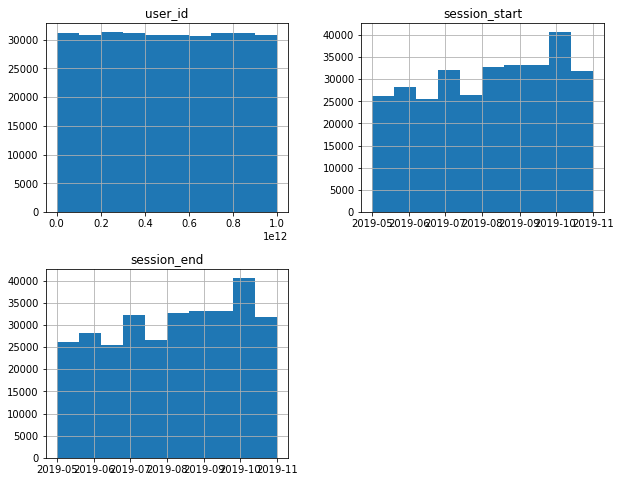

In [22]:
visits.hist(figsize=(10, 8));

В целом аномалий нет, да а какие аномалии могут быть в датах. 

Далее выведу описательную статистику столбцов в таблице orders.

In [23]:
orders.describe()

,user_id,revenue
count,40212.00,40212.00
mean,499029531203.23,5.37
std,286093675967.17,3.45
min,599326.00,4.99
25%,251132440436.75,4.99
50%,498283972665.00,4.99
75%,743332711780.00,4.99
max,999895427370.00,49.99


В столбце revenue (сумма заказа) стандартное отклонение незначительное, а величины максимальной и минимальной суммы заказов в пределах логики. Смущает, что величина 1-3 квартиль одинаковое. Посчитаю количество уникальных значений.

In [24]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

В целом, в таблице много заказов на незначительную сумму. На сумму практически 50 или 20 сделано чуть больше 200 заказов. Думаю, что эти значения не являются выбросами.

Далее исследую таблицу costs и выведу описательную статистику.

In [25]:
costs.describe()

,costs
count,1800.00
mean,58.61
std,107.74
min,0.80
25%,6.50
50%,12.29
75%,33.60
max,630.00


Стандартное отклонение от среднего указывает на достаточный разброс значений от среднего. Максимальный расход на компанию либо выброс, либо это было целью рекламной компании, то есть хотели увеличить бюджет. Построю гистограмму и посмотрю на распределение частот значений.  

<AxesSubplot:>

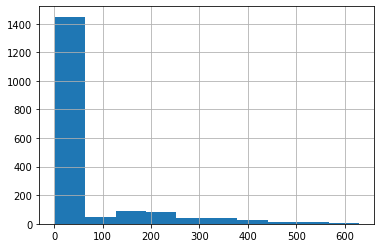

In [26]:
costs['costs'].hist()

Похоже и вправду было проведено много рекламных компаний с бюджетом до 100, и совсем немного компаний с высоким бюджетом. В данной таблице выбросов нет.

**Вывод**

Во время предобработки данных:

1. Названия всех столбцов приведены к нижнему регистру, где необходимо пробелы были заменены на нижнее подчеркивание;

2. В таблице visits в столбцах `session_st` и `session_end`, в таблице orders в столбце `event_dt`, в таблице costs в столбце `dt` изменен тип данных на datetime;

Аномалий и дубликатов не выявлено.


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Задаю функцию `get_profiles()` — для создания профилей пользователей.

Для создания пользовательских профилей с датой первого посещения и источником перехода на сайт напишу функцию `get_profiles()`. В ней сгруппирую значения датафрейма по пользовательскому ID и применю функцию `first()` и `last()` для session_start, а также чтобы найти первые значения region, device, channel.

In [27]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#### Задаю функцию `get_retention()` — для подсчёта Retention Rate

Аргументы функции `get_retention()`: 

- `profiles` — профили пользователей,
- `sessions` — данные журнала сессий,
- `observation_date` — момент анализа,
- `horizon_days` — горизонт анализа в днях,
- `ignore_horizon` — опция «игнорировать горизонт анализа», по умолчанию `False`.

In [28]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Задаю функцию `get_conversion()` — для подсчёта конверсии

In [29]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Задаю функцию `get_ltv()` — для подсчёта LTV

In [30]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Задаю функцию `filter_data()` — для сглаживания данных

In [31]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Задаю функцию  `plot_retention()` — для построения графика Retention Rate

In [32]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Задаю функцию `plot_conversion()` — для построения графика конверсии

In [33]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Задаю функцию `plot_ltv_roi` — для визуализации LTV и ROI

In [34]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Вызову функцию `get_profiles()`, чтобы составить профили пользователей по данным сессий из датафрейма `visits`.

In [35]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


Определим минимальную и максимальную даты привлечения пользователей.

In [36]:
# доступный интервал привлечения пользователей
min_date = profiles['dt'].min() # минимальная дата привлечения пользователей
max_date = profiles['dt'].max()  #  максимальная дата привлечения пользователей


print('Минимальная дата привлечения пользователей: {}\n'
      'Максимальная дата привлечения пользователей: {}\n'.format(min_date, max_date))

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27



Профиль пользователей составлен, а также определены минимальные (dt) даты привлечения пользователей. 

Минимальная дата привлечения пользователей - 1 мая 2019 года; максимальная дата - 27 октября 2019 года. Все корректно, с ТЗ согласуется, так как у меня для анализа имеются данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

#### Выясню, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих из каждой страны.

Для анализа я построю сводную таблицу и проведу группировку по стране пользователя.

In [37]:
profiles_pivot = profiles.pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
profiles_pivot.columns = ['Количество пользователей', 'Количество платящих', 'Доля платящих']
profiles_pivot.sort_values(by='Доля платящих', ascending=False)

,Количество пользователей,Количество платящих,Доля платящих
region,,,
United States,100002,6902,0.07
Germany,14981,616,0.04
UK,17575,700,0.04
France,17450,663,0.04


**Вывод:** 

Больше всего в приложение приходят пользователи из США, их более 100 тыс., на втором месте пользователи из Франции и Великобритании, их приходит практически одинаковое количество (17 тыс.), немного меньше пользователей из Германии (~15 тыс.).

Больше всего платящих пользователей также приходится на США (7%), примерно 4% платящих пользователей из Франции, Германии, Великобритании.

#### Узнаю, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построю таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

Для анализа я построю сводную таблицу и проведу группировку по типу устройства пользователя.

In [38]:
profiles_pivot = profiles.pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])\
                        
profiles_pivot.columns = ['Количество пользователей', 'Количество платящих', 'Доля платящих']
profiles_pivot.sort_values(by='Доля платящих', ascending=False)

,Количество пользователей,Количество платящих,Доля платящих
device,,,
Mac,30042,1912,0.06
iPhone,54479,3382,0.06
Android,35032,2050,0.06
PC,30455,1537,0.05


**Вывод:** 

Больше всего пользователей пользуется iPhone (почти 55 тыс.),почти в 1,5 раза меньше пользователей с Android, практически одинаковое количество пользователей используют PC и Mac (30 тыс.). 

Несмотря на то, что больше пользователей с iPhone, доля платящих таких пользователей составляет 6%, такая же доля платящих пользователей имеющих Android или Mac. Доля платящих клиентов с РС составляет 5%.

#### Изучу рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построю таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

Для анализа я построю сводную таблицу и проведу группировку по каналу привлечения пользователя.

In [39]:
profiles_pivot = profiles.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])\
                        
profiles_pivot.columns = ['Количество пользователей', 'Количество платящих', 'Доля платящих']
profiles_pivot.sort_values(by='Доля платящих', ascending=False)

,Количество пользователей,Количество платящих,Доля платящих
channel,,,
FaceBoom,29144,3557,0.12
AdNonSense,3880,440,0.11
lambdaMediaAds,2149,225,0.10
TipTop,19561,1878,0.10
RocketSuperAds,4448,352,0.08
WahooNetBanner,8553,453,0.05
YRabbit,4312,165,0.04
MediaTornado,4364,156,0.04
LeapBob,8553,262,0.03


**Вывод:** 

Больше всего пользователей - это органические пользователи (почти 57 тыс.), практически в 2 раза меньше пользователей приходит с канала FaceBoom (почти 30 тыс.), и канала TipTop(почти 20 тыс.). В остальных каналов приходит в десятки раз меньше пользователей.

Распределение по каналам платящих пользователей имеет совсем другую картину. С канала FaceBoom приходит больше платящих клиентов (12%). Достаточно необычно, но с канала AdNonSense приходит 11 % платящих клиентов, хотя всего пользователей с этого канала приходит около 4 тыс. С канала TipTop приходит 10 % платящих клиентов. С канала RocketSuperAds приходит 8 % платящих клиентов. С остальных каналов приходит и мало пользователей и доля платящих меньше 8%. Также выделяются органические пользователи, их них доля платящих всего 2%, хотя самих пользователей больше всего.

**ИТОГО:**  рекомендую обратить внимание на каналы FaceBoom, TipTop и RocketSuperAds, которые приносят больше платящих клиентов. Подробнее протестировать стоит и канал AdNonSense, возможно направить на него больше трафика, так как с него также идут платящие клиенты.

### Маркетинг

- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

#### Посчитать общую сумму расходов на маркетинг.

В таблице профилей пользователей в столбце acquisition_cost указана стоимость привлечения. Поэтому, чтобы посчитать сумму расходов на маркетинг сложу acquisition_cost.

In [40]:
print('Общая сумма расходов на маркетинг:', costs['costs'].sum().round())

Общая сумма расходов на маркетинг: 105497.0


Общая сумма расходов на маркетинг: 105497. 

#### Далее выясню, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

Для этого составлю сводную таблицу, посчитаю сумму затрат в разбивке по рекламным источникам. 

In [41]:
costs_pivot = costs.pivot_table(index='channel', values='costs', aggfunc=['sum'])
                        
costs_pivot.columns = ['Затраты']

# добавлю еще столбец с процентом затрат относитьельно всей суммы затрат
costs_pivot['Процент затрат'] = costs_pivot['Затраты'] / costs['costs'].sum() * 100
costs_pivot = costs_pivot.sort_values(by='Процент затрат', ascending=False)\
                         .style.format({'Процент затрат': '{:.2f}%', 'Затраты': '{:.2f}'})
costs_pivot

,Затраты,Процент затрат
channel,,
TipTop,54751.30,51.90%
FaceBoom,32445.60,30.75%
WahooNetBanner,5151.00,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833.00,1.74%
LeapBob,1797.60,1.70%
lambdaMediaAds,1557.60,1.48%
MediaTornado,954.48,0.90%


Больше всего денег потратили на источник TipTop (почти 55 тыс.) и FaceBoom (почти 33 тыс.). В десятки раз меньше трат на источники WahooNetBanner (5 тыс.), AdNonSense (почти 4 тыс.) и  OppleCreativeMedia (почти 2 тыс.).

#### Далее построю визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

Сначала создам столбец 'week' с порядковым номером недели и 'month' - месяца. Затем построю граффики, причем при анализе выше замтно выделяются 2 канала с наибольшими затратами. Для них я построю отдельные граффики, чтобы сделать их более читаемыми.

In [42]:
costs['month'] = costs['dt'].astype('datetime64[M]').dt.month
costs['week'] = costs['dt'].astype('datetime64[W]').dt.isocalendar().week

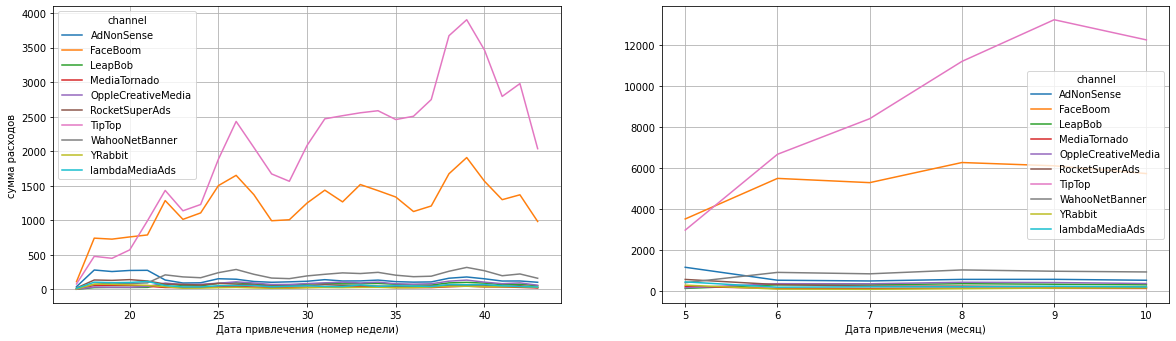

In [43]:
plt.figure(figsize=(20, 12)) # задаю размер сетки для графиков

# отбираю каналы с наибольшими расходами на рекламу
costs.pivot_table(index='week',  # порядковый номер недели
                  columns='channel',  # источники переходов
                  values='costs',  # расходы
                  aggfunc='sum') \
    .plot(grid=True,
          ax=plt.subplot(2, 2, 1)) # задаю расположение графиков
# plt.title('Динамика изменения расходов по неделям по каналам с суммой расходов более 500')
plt.xlabel('Дата привлечения (номер недели)')
plt.ylabel('сумма расходов')

costs.pivot_table(index='month',  # порядковый номер недели
                  columns='channel',  # источники переходов
                  values='costs',  # расходы
                  aggfunc='sum') \
    .plot(grid=True,
          ax=plt.subplot(2, 2, 2)) # задаю расположение графиков
plt.xlabel('Дата привлечения (месяц)')
plt.show()

По каналам TipTop и FaceBoom наблюдается рост расходов, причем раходы по TipTop растут быстрее. В недельном разрезе заменты пики наибольших расходом на 23, 26, 39 недели.

По остальным каналам наблюдается незначительный рост расходов до 20 недели, затем резкий спад до 23 недели (6 месяц), а далее до конца октября раходы практически не меняются, правда на 39 неделе наблюдается незначительное увеличение расходов.

Выделяется канал WahooNetBanner по которому с самого начала мая наблюдается рост расходов с пиками на 23, 26 и 39 недели.

**Вывод:**

- Общая сумма расходов на маркетинг: 105497
- Больше всего денег потратили на источник TipTop (почти 55 тыс.) и FaceBoom (почти 33 тыс.). В десятки раз меньше трат на источники WahooNetBanner (5 тыс.), AdNonSense (почти 4 тыс.) и  OppleCreativeMedia (почти 2 тыс.).
- По каналам TipTop и FaceBoom наблюдается рост расходов, причем раходы по TipTop растут быстрее. В недельном разрезе заменты пики наибольших расходом на 23, 26, 39 недели. По остальным каналам наблюдается незначительный рост расходов до 20 недели, затем резкий спад до 23 недели (6 месяц), а далее до конца октября раходы практически не меняются, правда на 39 неделе наблюдается незначительное увеличение расходов. Выделяется канал WahooNetBanner по которому с самого начала мая наблюдается рост расходов с пиками на 23, 26 и 39 недели.


    
#### Проведу исследование. Узнаю, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используя профили пользователей.

In [44]:
profiles.groupby('channel').agg(cac_mean=('acquisition_cost', 'mean'))\
         .sort_values(by='cac_mean', ascending=False)

,cac_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


Вывод: Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее - FaceBoom (1,11), AdNonSense (1,01). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72.

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, буду анализировать окупаемость рекламы. Считаю, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответить на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

#### Установлю момент и горизонт анализа данных

Для начала установлю момент и горизонт анализа данных. Считаю, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. После этого можно приступать к анализу окупаемости рекламы.

In [45]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа две недели

#### Проанализирую окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

   
Для этого и остальных расчетов будут построены граффики без органического траффика.

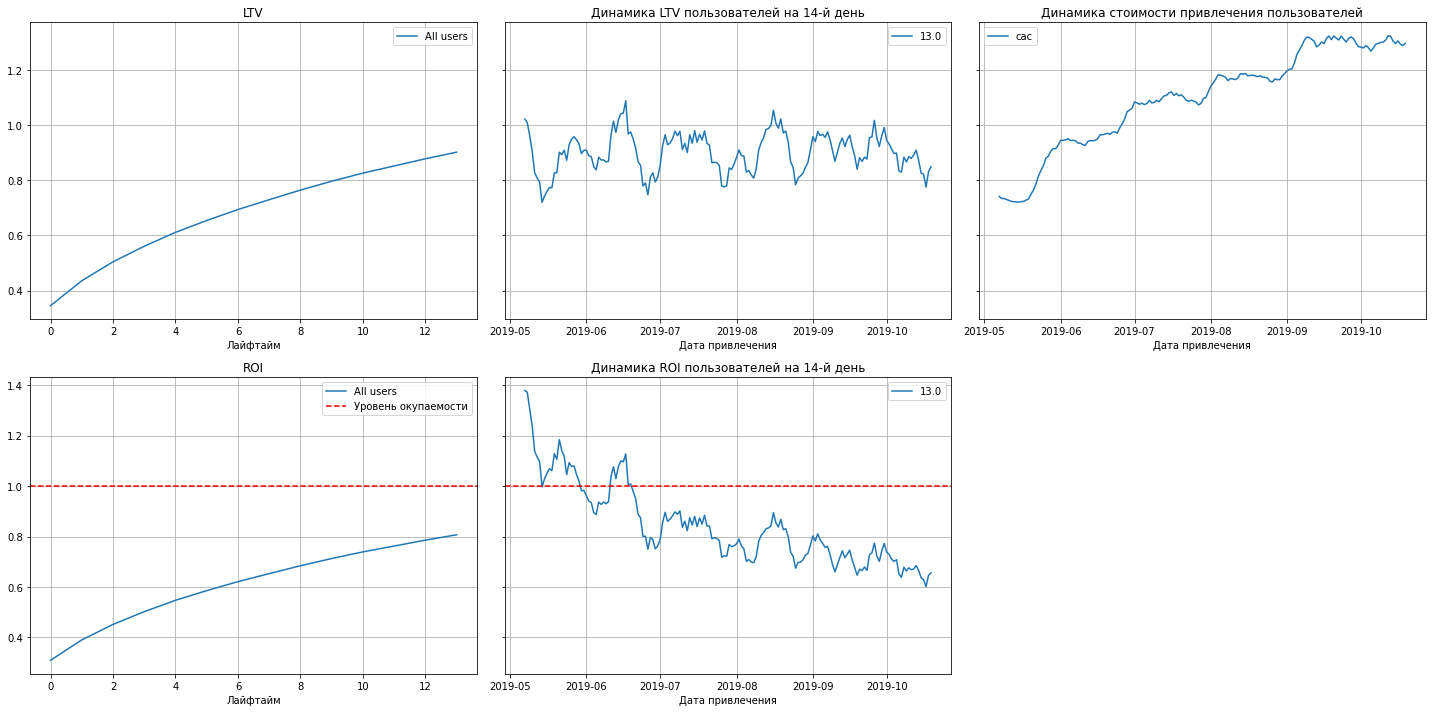

In [46]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

   
По графикам можно сделать такие выводы:
- Реклама не окупается.
- Стоимость привлечения пользователя (CAC) также постепенно увеличивается. Под конец 2 недели немного стабилен. Значит, дело не в увеличении рекламного бюджета. 
- LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.




#### Проверю конверсию пользователей и динамику её изменения. То же самое сделаю с удержанием пользователей. Построю и изучите графики конверсии и удержания.

Сначала изучу общую конверсия и ее динамику, а затем проанализирую в разбивке по странам, устройствам и каналам привлечения.

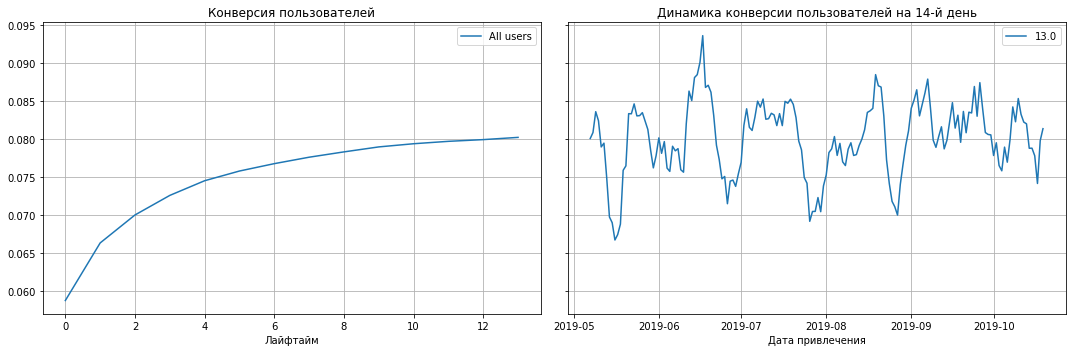

In [47]:
# считаем конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days)

# строим графики
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

В первые 1,5 месяца конверсия экспоненциально росла, а затем стабилизировалась. Имеются пики конверсии в середине каждого месяца, а также провалы под конец месяца.

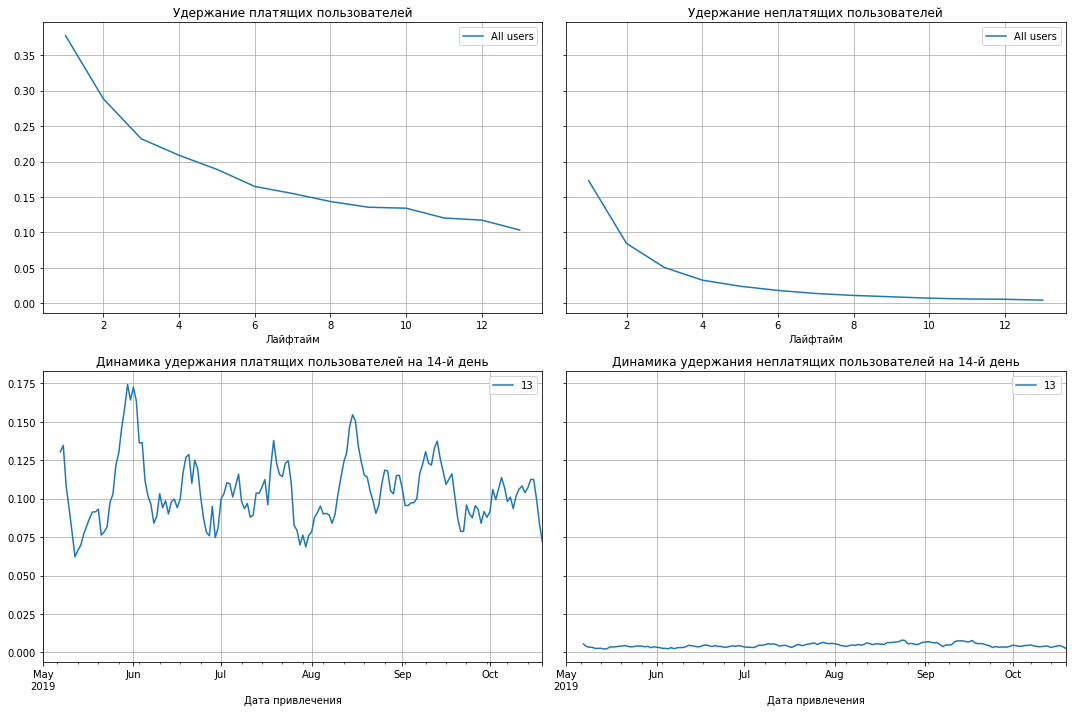

In [48]:
# считаем удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits.query('channel != "organic"'), observation_date, horizon_days)

# строим графики
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание как платящих, так и неплатящих клиентов плохо и экспоненциально убывает за все время действие рекламы. Однако удержание платящих клиентов в 2 раза выше. Динамика в целом достаточно стабильна.

Далее изучу конверсию в разбивке по каналам привлечения, устройствам, странам.

Разбивка по channel


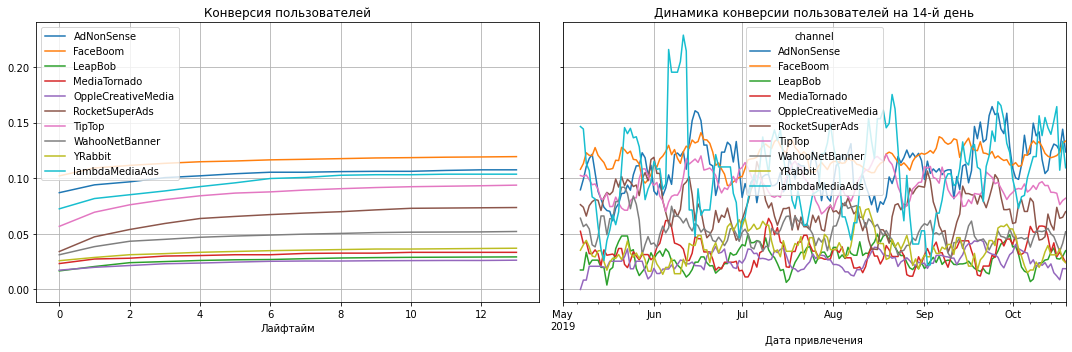

Разбивка по device


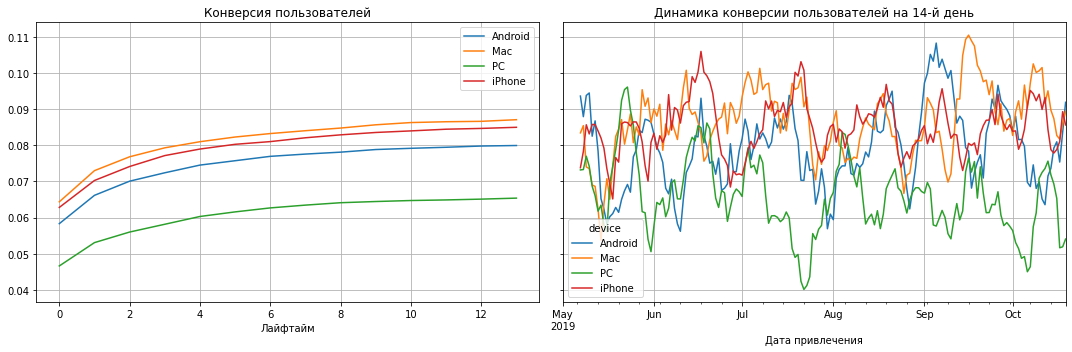

Разбивка по region


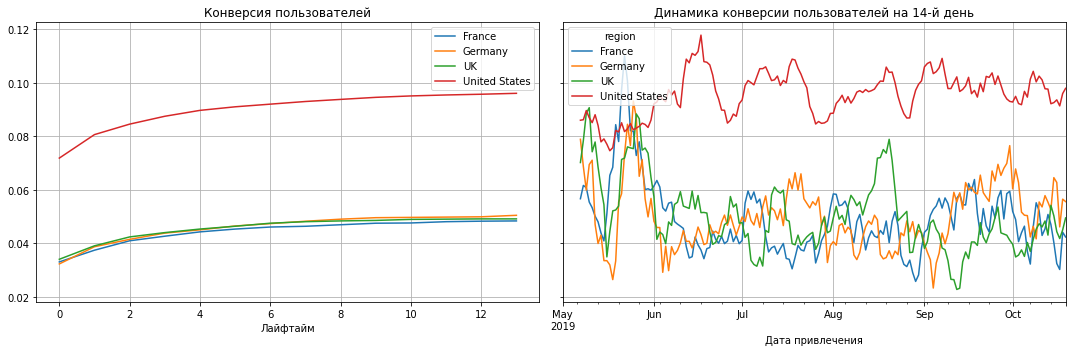

In [49]:
column_name = ['channel', 'device', 'region']

for t in column_name:
    conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=[t])
    # строим графики
    print('Разбивка по', t)
    plot_conversion(conversion_grouped, conversion_history, horizon_days) 

В разбивке по каналам, наибольшая конверсия у каналов: FaceBoom, AdNonSense, LambdaMediaAds, TipTop. Наиболее ярковыраженные пики у динамики конверсии по каналу  LambdaMediaAds.

В разбивке по устройствам, наибольшая конверсия у пользователей Mac и iPhone, конверсия пользователей Android чуть меньше. В целом динамика конверсии стабильна.

В разбивке по странам, наибольшая конверсия у пользователей из США. Величина конверсии пользователей из Германии, Франции и Великобритании сильно ниже. Динамика стабильна.

Далее в этих же разрезах изучу удержание пользователей.

Разбивка по channel


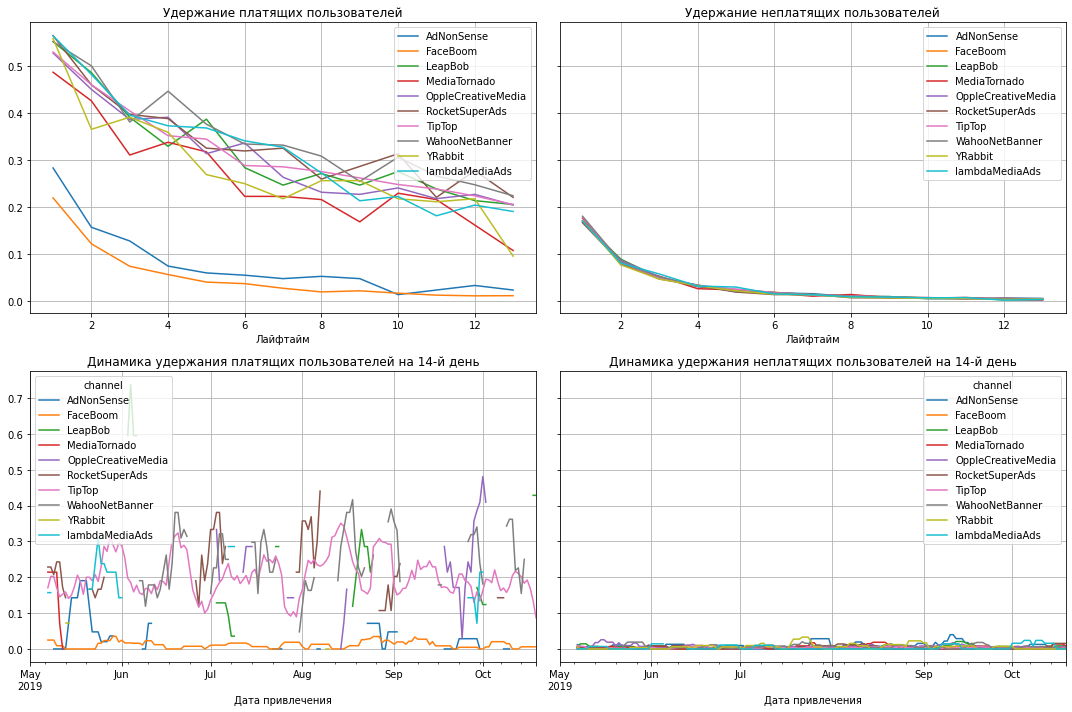

Разбивка по device


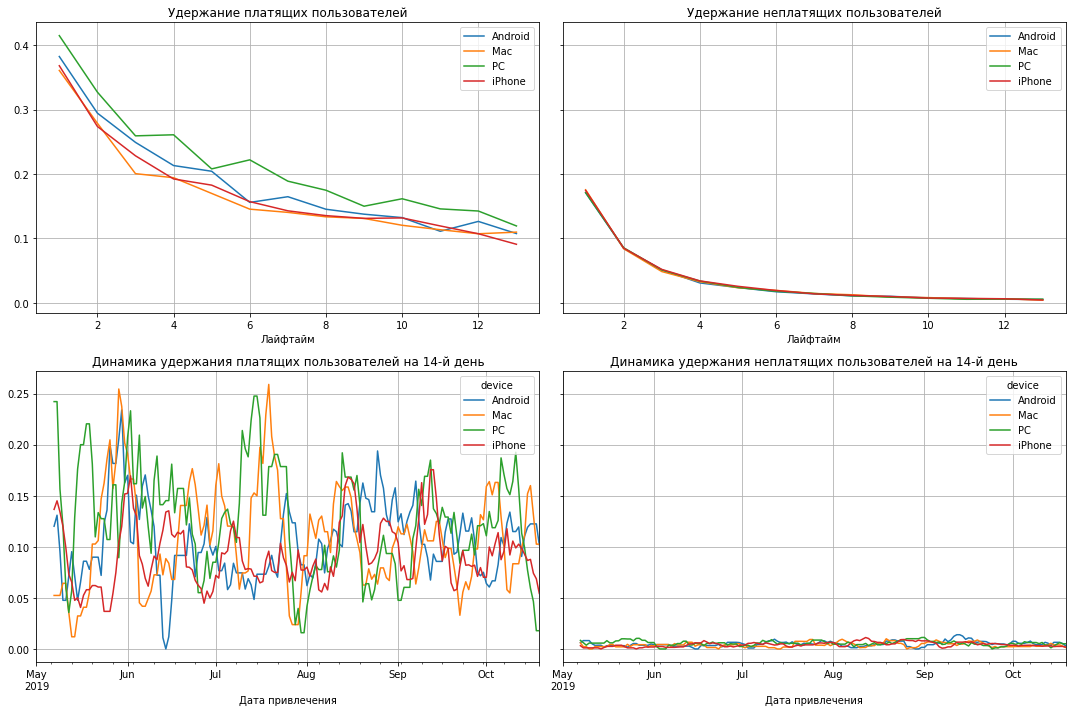

Разбивка по region


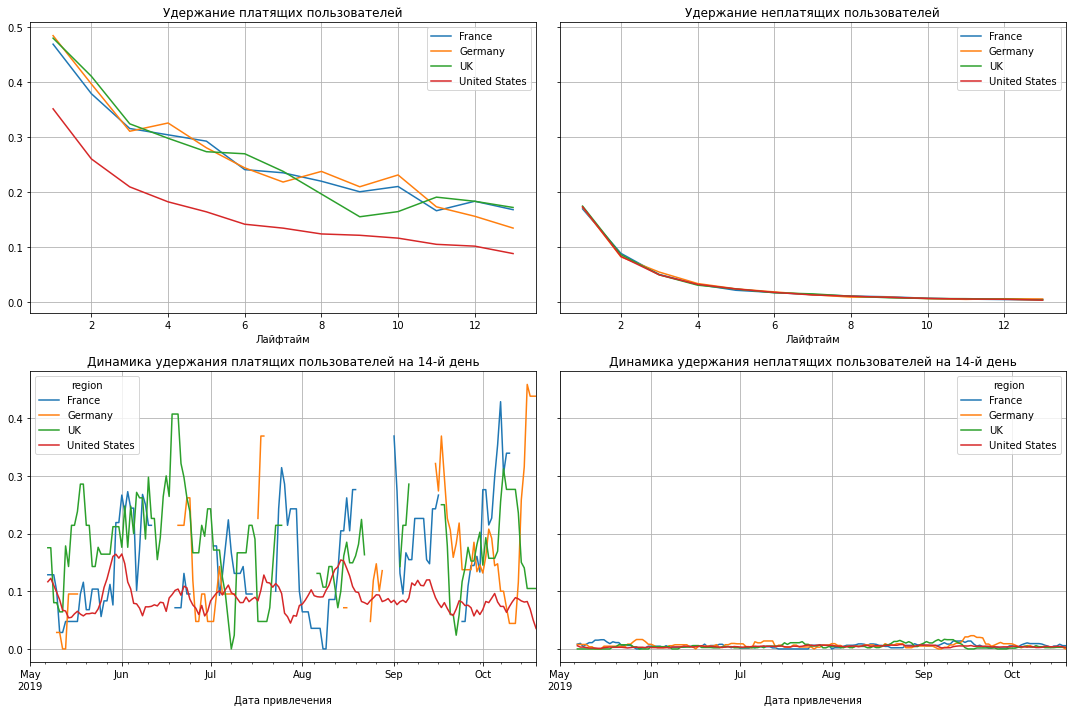

In [50]:
column_name = ['channel', 'device', 'region']

for t in column_name:
    retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits.query('channel != "organic"'), observation_date, horizon_days, dimensions=[t])
    # строим графики
    print('Разбивка по', t)
    plot_retention(retention_grouped, retention_history, horizon_days) 


Разбивка по каналам. Среди платящих пользователей удержание по каналам AdNonSense и FaceBoom выбивается из общей картины и имеет наихудшие удержание, а на канал FaceBoom идет большой расход бюджета. Надо работать над удержанием по этому каналу. Удержание неплатящих клиентов одинаково для всех каналов. Причем удержание платящих с каналов AdNonSense и FaceBoom совпадает с удержанием неплатящих. Надо это исправлять. Динамика и там и такм стабильна

Разбивка по устройствам. Среди платящих пользователей удержание пользователей с PC немного лучше, чем остальных пользователей. В целом удержание платящих по всем устройтсвам равномерное.

Разбивка по странам. Среди платящих пользователей удержание пользователей из США самое худшее, когда конверсия наоборот самая высокая. Надо работать над удержанием пользователей из США, чтобы увеличить доходы. Удержание пользователей из остальных стран выше.

**Вывод:**
- наибольшая конверсия и наихудшее удержание у каналов FaceBoom, AdNonSense. Необходимо улучшить удержание у пользователей этих каналов;
- удержание пользователей в разбивке по устройствам равномерное, но лучшая конверсия у пользователей Mac и iPhone, следует на них сделать акцент;
- наибольшая конверсия у пользователей из США, но при этом удержание этих пользователей наихудшее. Это следует исправить.


#### Проанализирую окупаемость рекламы с разбивкой по устройствам. Построюграфики LTV и ROI, а также графики динамики LTV, CAC и ROI.

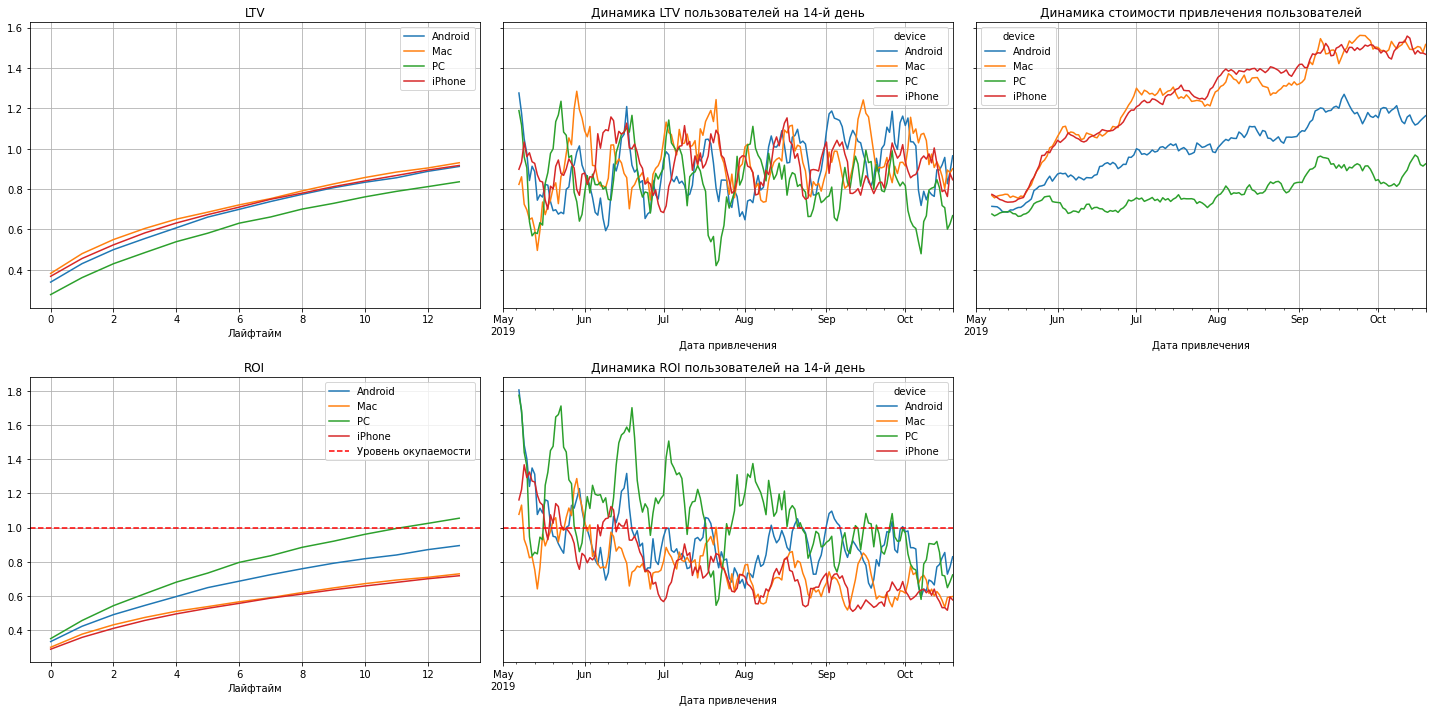

In [51]:
# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['device'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

    
По графикам с разбивкой по устройствам можно сделать такие выводы:
- Реклама практически не окупается. Только под конец 2 недели она начала окупаться у пользователей РС. Для пользователей с остальными устройствами, реклама не окупается
- Стоимость привлечения для всех устройств имеет резкий скачек в июне, а затем плавный рост. Стоимость привлечения наибольшая у пользователей iPhone и Мас.
- Несмотря на плохую окупаемость, LTV пользователей iPhone и Мас хорошее. Ниже всех показатель LTV у пользователей РС.



#### Проанализирую окупаемость рекламы с разбивкой по странам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

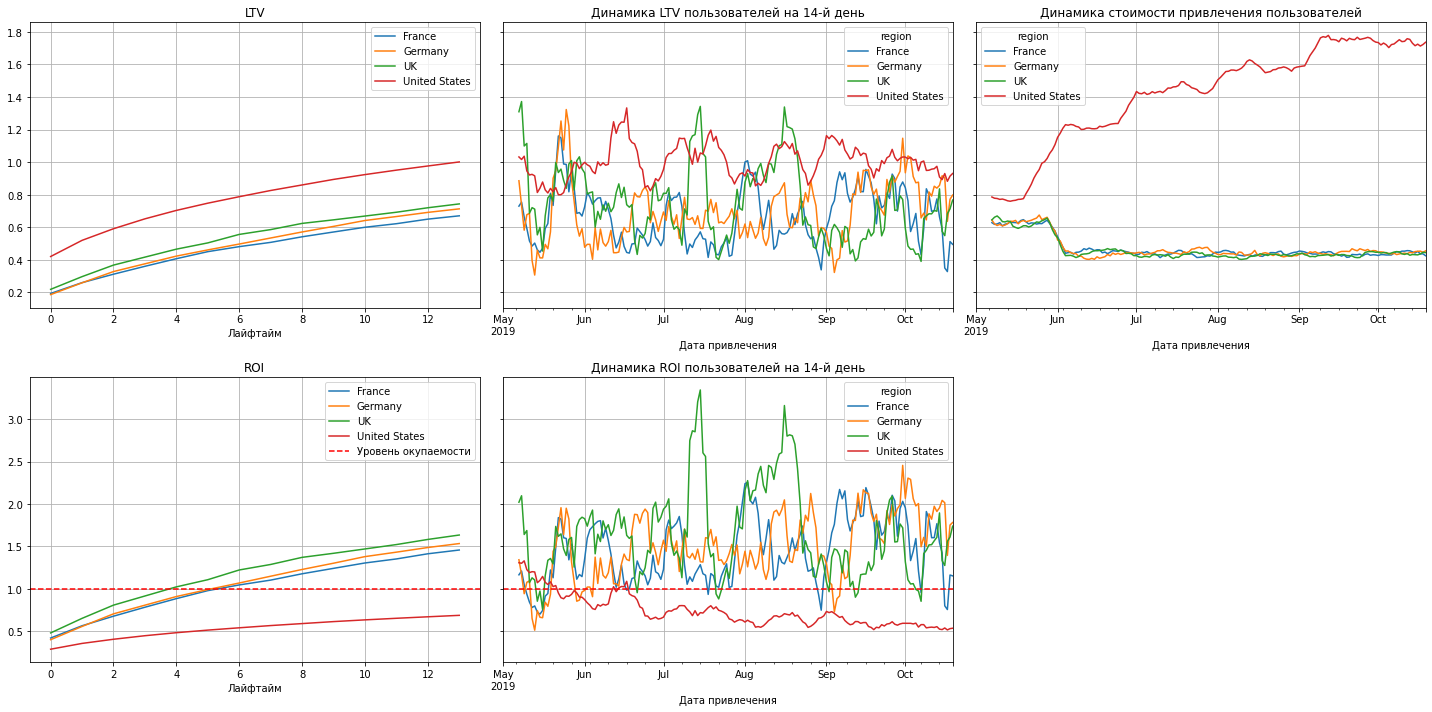

In [52]:
# считаем LTV и ROI с разбивкой по странам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['region'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

    
По графикам с разбивкой по странам можно сделать такие выводы:
- Реклама окупается для пользователей из всех стран кроме США. 
- Стоимость привлечения для пользователей из США в июне увеличилась в 2 раза, а затем продолжила плавно расти. Стоимость привлечения пользоватлей из других стран, наоборот уменьшилась в июне, а затем стабилизировалась. 
- Несмотря на плохую окупаемость, LTV пользователей из США выше, чем для других пользователей.



#### Проанализирую окупаемость рекламы с разбивкой по рекламным каналам. Построю графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

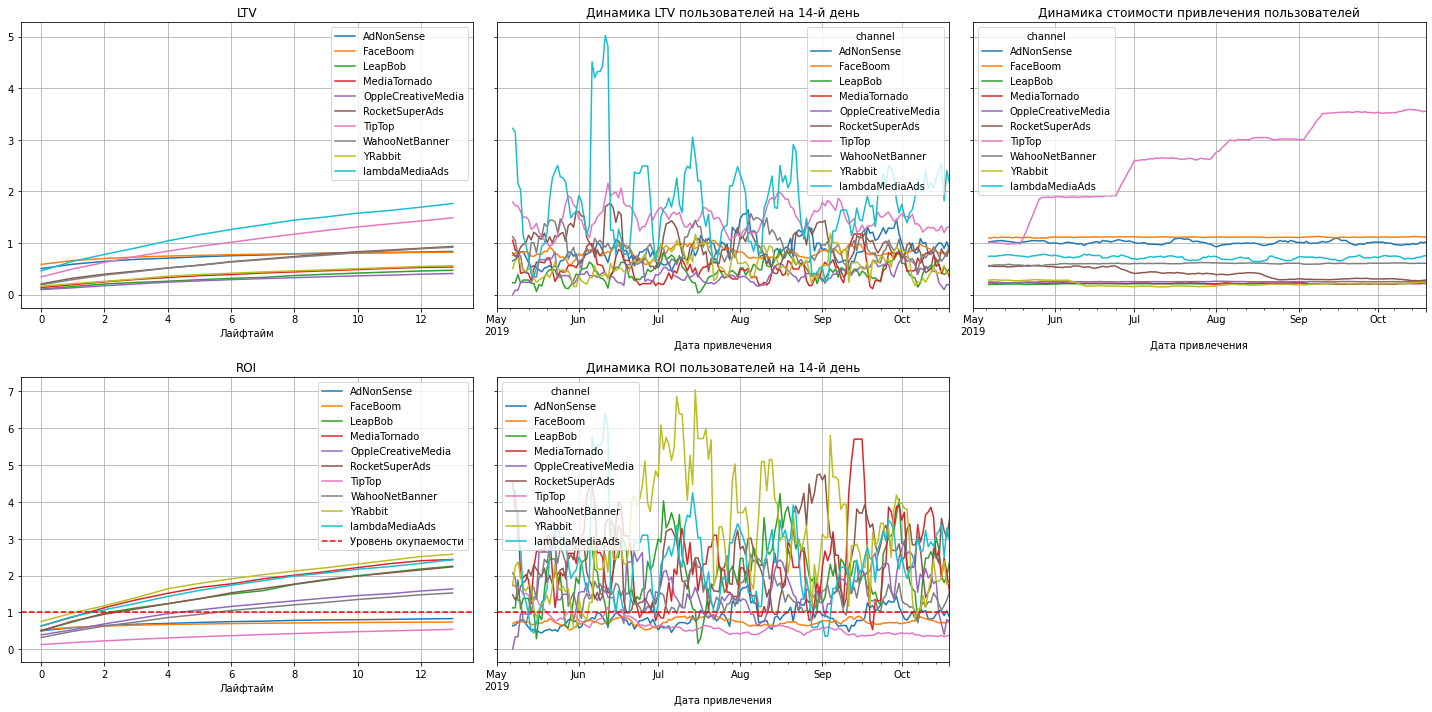

In [53]:
# считаем LTV и ROI с разбивкой по рекламным каналам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['channel'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам с разбивкой по рекламным каналам можно сделать такие выводы:
- Реклама окупается для всех рекламных каналов кроме FaceBoom, AdNonSense, TipTop. 
- Стоимость привлечения для всех каналов стабильна и не растет, кроме канала TipTop, у которого ступенчато каждый месяц идет рост стоимости. 
- LTV наивысший у  пользователей из TipTop и LambdaMediaAds.

**Вывод:**
- В целом реклама не окупается, а стоимость привлечения новых пользователей растет
- негативно на окупаемость рекламы погут влиять:
  - пользователи из США. У них высокая стоимость привлечения и низкая окупаемость. Вероятно это связано с низким удержанием;
  - пользователи iPhone и Мас. У них низкая окупаемость, но высокая стоимость привлечения
  - пользователи с каналов FaceBoom, AdNonSense. Реклама на этих каналах не окупается, что вероятно связано с плохим удержанием. 
- проблемы окупаемости вероятно связаны с неправильным выбора рекламного канала, устройства и страны. Также необходимо улучшать удержание клиентов. 


## Общий вывод


## Во время исследовательского анализы были сформулированы следующие выводы:

1. Больше всего в приложение приходят пользователи из США, их более 100 тыс., на втором месте пользователи из Франции и Великобритании (17 тыс.), немного меньше пользователей из Германии (почти 15 тыс.). Платящие клиенты в основном также приходятся на США (7%), примерно 4% платящих пользователей из Франции, Германии, Великобритании.

2. Больше всего пользователей пользуется iPhone (почти 55 тыс.),почти в 1,5 раза меньше пользователей с Android, практически одинаковое количество пользователей используют PC и Mac (30 тыс.).  Несмотря на то, что больше пользователей с iPhone, доля платящих таких пользователей составляет 6%, такая же доля платящих пользователей имеющих Android или Mac. Доля платящих клиентов с РС составляет 5%.

3. Больше всего платящих клиентов приносят рекламные каналы: FaceBoom, TipTop и RocketSuperAds, AdNonSense.
 


## Во время маркетингового анализа были сформулированы следующие выводы:

1. Общая сумма расходов на маркетинг: 105497
2. Больше всего денег потратили на источник TipTop (почти 55 тыс.) и FaceBoom (почти 33 тыс.). В десятки раз меньше трат на источники WahooNetBanner (5 тыс.), AdNonSense (почти 4 тыс.) и  OppleCreativeMedia (почти 2 тыс.).
3. По каналам TipTop и FaceBoom наблюдается рост расходов, причем раходы по TipTop растут быстрее. В недельном разрезе заменты пики наибольших расходом на 23, 26, 39 недели. По остальным каналам наблюдается незначительный рост расходов до 20 недели, затем резкий спад до 23 недели (6 месяц), а далее до конца октября раходы практически не меняются, правда на 39 неделе наблюдается незначительное увеличение расходов. Выделяется канал WahooNetBanner по которому с самого начала мая наблюдается рост расходов с пиками на 23, 26 и 39 недели.
4. Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее - FaceBoom (1,11), AdNonSense (1,01). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72.


## Выводы после оценки окупаемости рекламы:
1. В целом реклама не окупается, а стоимость привлечения новых пользователей растет.
2. Негативно на окупаемость рекламы погут влиять:
   - пользователи из США. У них высокая стоимость привлечения и низкая окупаемость. Вероятно это связано с низким удержанием;
   - пользователи iPhone и Мас. У них низкая окупаемость, но высокая стоимость привлечения
   - пользователи с каналов FaceBoom, AdNonSense. Реклама на этих каналах не окупается, что вероятно связано с плохим удержанием. 
   - проблемы окупаемости вероятно связаны с неправильным выбора рекламного канала, устройства и страны. Также необходимо улучшать удержание клиентов.

## Причины неэффективности привлечения пользователей:

1. Завышены расходы по рекламному каналу FaceBoom, реклама не окупается.
2. Завышены расходы на пользователей из США.
3. Завышены расходы на пользователей iPhone и Мас
4. Низкое удержание пользователей:
   - из США, 
   - привлеченных с каналов FaceBoom, AdNonSense

## Рекомендации для отдела маркетинга:

1. Снизить расходы на рекламу по каналам FaceBoom, TipTop
2. Уменьшить рекламу для пользователей из США, а также для владельцев iPhone и Мас. Желательно ориентироваться на величину расходов по другим странам, устройствам.
3. Выяснить причины низкого удержания клиентов, в особенности клиентов из США или привлеченных с каналов FaceBoom, AdNonSense
4. Увеличить показ рекламы пользователям РС
5. Увеличить бюджет на рекламу по каналу RocketSuperAds, у него высокая доля платящих клиентов, а также окупаемость рекламы быстро растет